In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [41]:
import os
from PIL import Image

input_folder = r'C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data'
output_folder = r'C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data_konversi'

os.makedirs(output_folder, exist_ok=True)

def convert_images(input_folder, output_folder, target_format="JPEG"):
    for root, _, files in os.walk(input_folder):
        for filename in files:
            input_path = os.path.join(root, filename)
            relative_path = os.path.relpath(root, input_folder)
            output_subfolder = os.path.join(output_folder, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            try:
                with Image.open(input_path) as img:
                    if img.mode != "RGB":
                        img = img.convert("RGB")
                    
                    new_filename = os.path.splitext(filename)[0] + f".{target_format.lower()}"
                    output_path = os.path.join(output_subfolder, new_filename)
                    
                    img.save(output_path, target_format)
                    print(f"Berhasil mengonversi: {input_path} -> {output_path}")
            except Exception as e:
                print(f"Error saat mengonversi {input_path}: {e}")

convert_images(input_folder, output_folder, target_format="JPEG")


Berhasil mengonversi: C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data\Busuk\busuk_01.jpg -> C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data_konversi\Busuk\busuk_01.jpeg
Berhasil mengonversi: C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data\Busuk\busuk_02.jpg -> C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data_konversi\Busuk\busuk_02.jpeg
Berhasil mengonversi: C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data\Busuk\busuk_03.jpg -> C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data_konversi\Busuk\busuk_03.jpeg
Berhasil mengonversi: C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data\Busuk\busuk_04.jpg -> C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data_konversi\Busuk\busuk_04.jpeg
Berhasil mengonversi: C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data\Busuk\busuk

In [42]:
data_dir = r"C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\train_data_konversi"
img_size = 180
batch = 32

In [43]:
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
)

total_count = len(dataset) * batch 
print("Total Images: ", total_count)

train_count = int(total_count * 0.8)
val_count = int(total_count * 0.1)
test_count = total_count - train_count - val_count

print("Train Images: ", train_count)
print("Validation Images: ", val_count)
print("Test Images: ", test_count)

train_ds = dataset.take(train_count // batch)
val_ds = dataset.skip(train_count // batch).take(val_count // batch)
test_ds = dataset.skip(train_count // batch + val_count // batch).take(test_count // batch)

class_names = dataset.class_names
print("Class Names: ", class_names)

Found 301 files belonging to 3 classes.


Total Images:  320
Train Images:  256
Validation Images:  32
Test Images:  32
Class Names:  ['Busuk', 'Matang', 'Mentah']


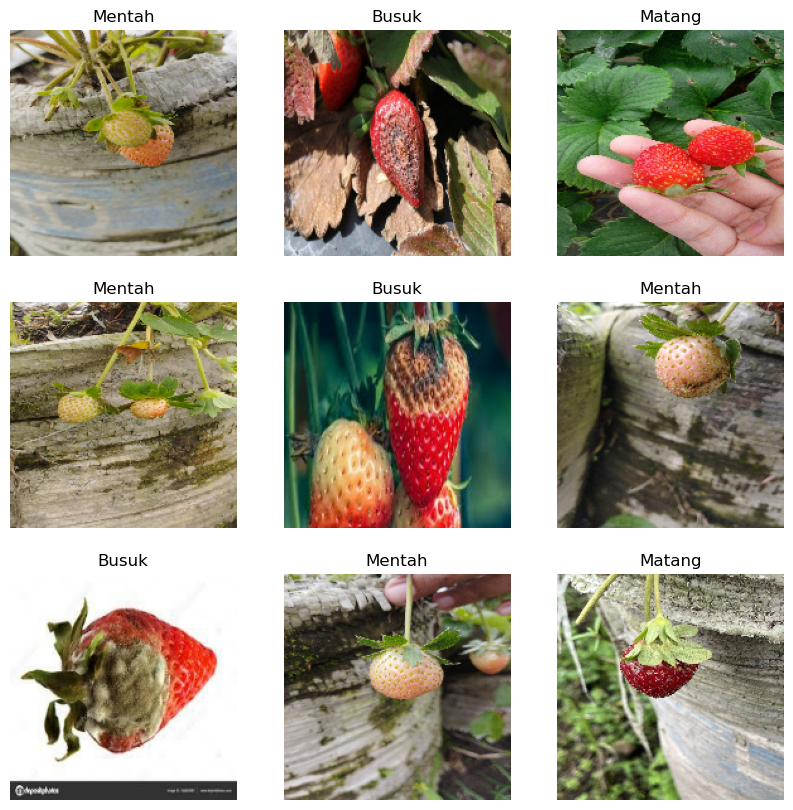

In [44]:
i = 0
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [45]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

(32, 180, 180, 3)


In [46]:
Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)

In [47]:
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

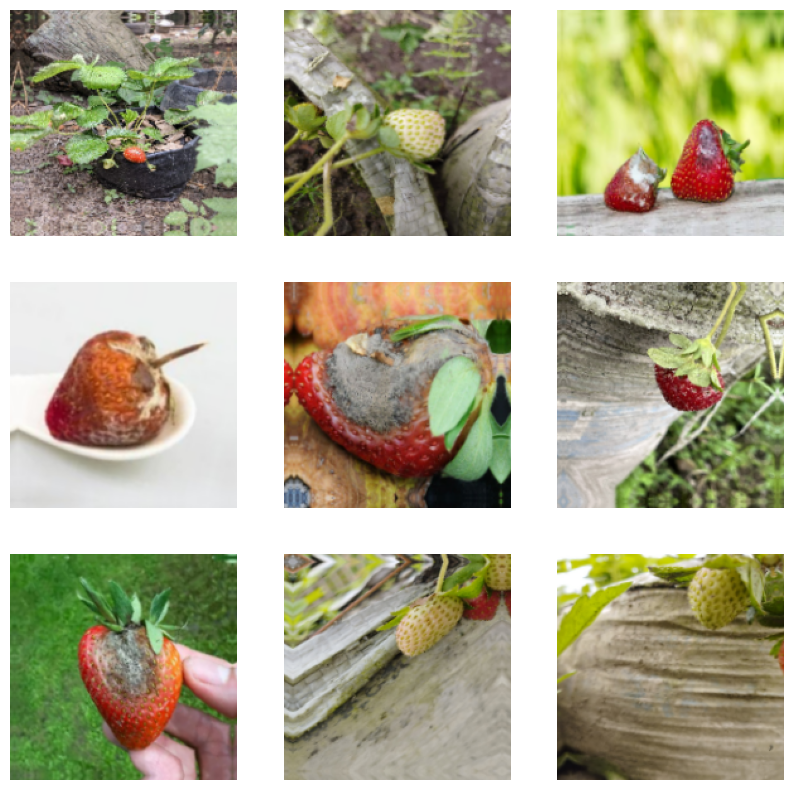

In [48]:
i = 0
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype('uint8'))
        plt.axis('off')

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models

def vgg16(input_shape, n_classes):
    base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization()) 
    model.add(layers.Dropout(0.5))  
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])
    
    return model

In [50]:
input_shape = (180, 180, 3)
n_classes = len(class_names)  # 3 classes: ['Busuk', 'Matang', 'Mentah']

In [51]:
tf.keras.backend.clear_session()

In [52]:
model = vgg16(input_shape, n_classes)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,993,539 (68.64 MB)

 Trainable params: 3,278,339 (12.51 MB)

 Non-trainable params: 14,715,200 (56.13 MB)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6639 - loss: 1.0554 - val_accuracy: 0.9688 - val_loss: 0.2871
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9583 - loss: 0.0799 - val_accuracy: 0.9062 - val_loss: 0.2457
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0220 - val_accuracy: 0.9375 - val_loss: 0.1331
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9965 - loss: 0.0141 - val_accuracy: 0.9375 - val_loss: 0.0790
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.9688 - val_loss: 0.0385
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0192
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0147
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 9/30
8/8 

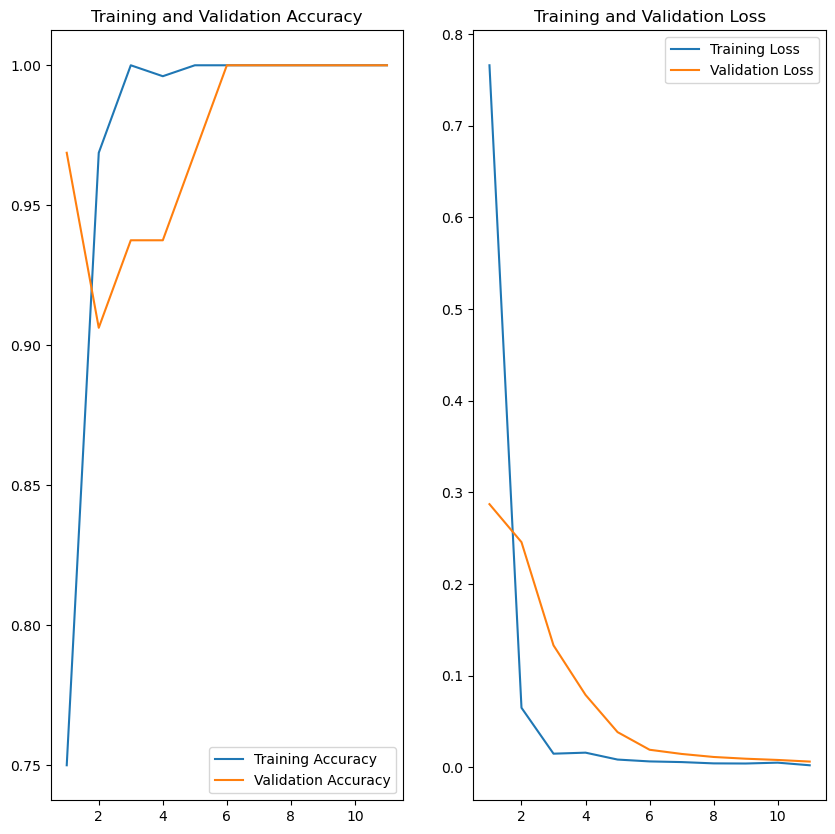

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

history = model.fit(train_ds, 
                    epochs=30, 
                    validation_data=val_ds, 
                    callbacks=[early_stopping])

epochs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history ['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
model.save('VGG CNN_Matplotlib.h5')

In [55]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model(r'C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\VGG CNN_Matplotlib.h5')  # Ganti dengan path model Anda
class_names = ['Busuk', 'Matang', 'Mentah']

In [56]:
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))  # Sesuaikan ukuran jika perlu
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Add batch dimension

        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"


In [57]:
result = classify_images(r'C:\Users\vina qhurotu aini\Documents\KULIAH\SEMESTER 5\ML\Tubes\test_data\Busuk\busuk_09.jpg', save_path='busuk9.jpg')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Prediksi: Busuk
Confidence: 57.55%
Prediksi: Busuk dengan confidence 57.55%. Gambar asli disimpan di busuk9.jpg.


In [58]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(180, 180)
)

Found 29 files belonging to 3 classes.


In [60]:
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [61]:
true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  # Konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels)

In [62]:
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

In [63]:
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

In [64]:
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

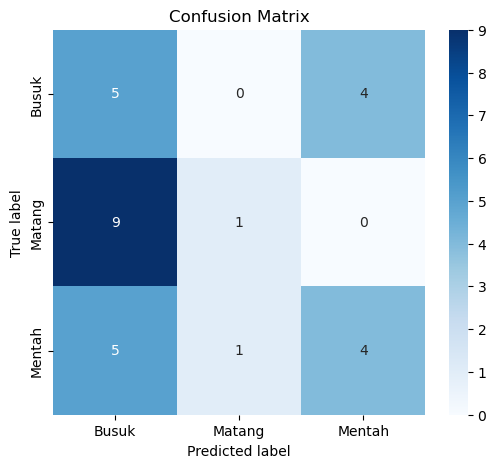

In [65]:
f1_score = 2 * (precision * recall) / (precision + recall)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Busuk", "Matang", "Mentah"], yticklabels=["Busuk", "Matang", "Mentah"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [66]:
print("Confusion Matrix: \n", conf_mat.numpy())
print("Akurasi: ", accuracy.numpy())
print("Presisi: ", precision.numpy())
print("Recall: ", recall.numpy())
print("F1 Score: ", f1_score.numpy())

Confusion Matrix: 
 [[5 0 4]
 [9 1 0]
 [5 1 4]]
Akurasi:  0.3448275862068966
Presisi:  [0.26315789 0.5        0.5       ]
Recall:  [0.55555556 0.1        0.4       ]
F1 Score:  [0.35714286 0.16666667 0.44444444]
